In [2]:
!pip install seaborn==0.11.1

     -------------------------------------- 285.0/285.0 kB 5.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

claims = pd.read_csv('data/claims_preprocessed.csv', index_col=0)
customer = pd.read_csv('data/customers_preprocessed.csv', index_col = 0)

In [7]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   incident_severity                5000 non-null   float64
 1   num_vehicles_involved            5000 non-null   int64  
 2   num_injuries                     5000 non-null   int64  
 3   num_witnesses                    5000 non-null   int64  
 4   police_report_available          5000 non-null   float64
 5   injury_claim                     5000 non-null   int64  
 6   vehicle_claim                    5000 non-null   int64  
 7   total_claim_amount               5000 non-null   int64  
 8   incident_month                   5000 non-null   int64  
 9   incident_day                     5000 non-null   int64  
 10  incident_dow                     5000 non-null   int64  
 11  incident_hour                    5000 non-null   int64  
 12  fraud               

In [8]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_age               5000 non-null   int64  
 1   customer_education         5000 non-null   int64  
 2   months_as_customer         5000 non-null   int64  
 3   policy_deductable          5000 non-null   int64  
 4   policy_annual_premium      5000 non-null   int64  
 5   policy_liability           5000 non-null   int64  
 6   auto_year                  5000 non-null   int64  
 7   num_claims_past_year       5000 non-null   int64  
 8   num_insurers_past_5_years  5000 non-null   int64  
 9   customer_gender_male       5000 non-null   float64
 10  customer_gender_female     5000 non-null   float64
 11  policy_state_ca            5000 non-null   float64
 12  policy_state_wa            5000 non-null   float64
 13  policy_state_az            5000 non-null   float

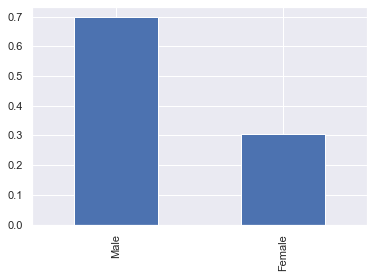

In [13]:
#plot the bar graph customer gender
customer.customer_gender_female.value_counts(normalize=True).plot.bar() #setting normalize = True will show the frequency of the uniqe values instead of count
plt.xticks([0,1],['Male','Female'])
plt.show()

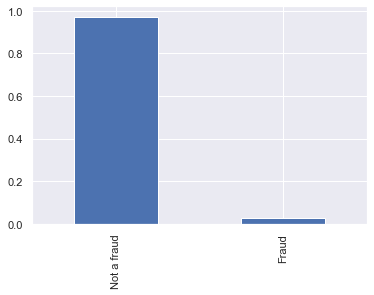

In [14]:
#plot the bar chart of fraudulent claims
claims.fraud.value_counts(normalize=True).plot.bar()
plt.xticks([0,1], ['Not a fraud','Fraud'])
plt.show()

In [15]:
#plot the education categories 
ed = customer.customer_education.value_counts(normalize=True,sort=False)

In [22]:
ed.index #the index of value_counts shows all unique values 

Int64Index([2, 3, 4, 1, 0], dtype='int64')

In [21]:
ed.values #the values of value_count shows either the count or frequency if normalize is True

array([0.0936, 0.4436, 0.1894, 0.2538, 0.0196])

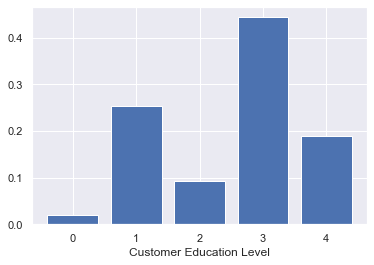

In [20]:
plt.bar(ed.index, ed.values)
plt.xlabel("Customer Education Level");

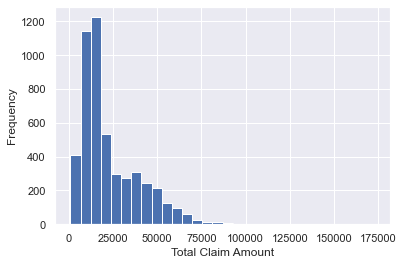

In [23]:
#Plot the total claims amount
claims.total_claim_amount.plot.hist(bins = 30)
plt.xlabel('Total Claim Amount')
plt.show()

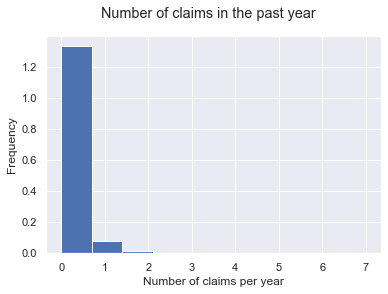

In [25]:
customer.num_claims_past_year.plot.hist(density = True)
plt.suptitle("Number of claims in the past year")
plt.xlabel("Number of claims per year")
plt.show()

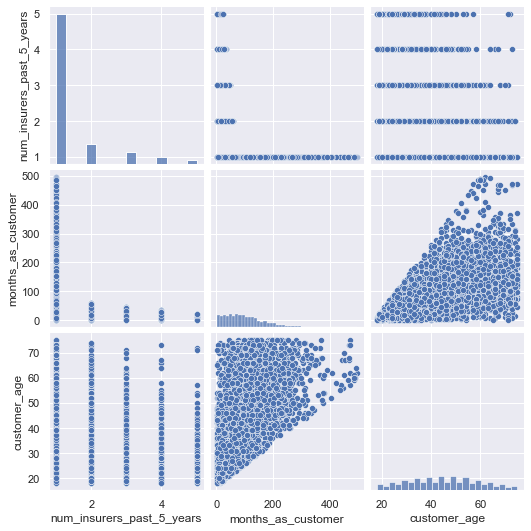

In [27]:
sns.pairplot(
    data=customer, vars=["num_insurers_past_5_years", "months_as_customer", "customer_age"]
);

### Pairplot can be used to check for correlation between features 
#### In the above plot, we can see months_as_customer is positively correlated with customer_age while negatively correlated with num_insurance_past_5_years

In [28]:
customer.head()

,customer_age,customer_education,months_as_customer,policy_deductable,policy_annual_premium,policy_liability,auto_year,num_claims_past_year,num_insurers_past_5_years,customer_gender_male,customer_gender_female,policy_state_ca,policy_state_wa,policy_state_az,policy_state_or,policy_state_nv,policy_state_id
policy_id,,,,,,,,,,,,,,,,,
1,54,2,381,750,3000,1,2019,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,41,3,31,750,3000,3,2017,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,57,3,84,750,3000,3,2014,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,74,4,123,750,2600,2,2018,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,39,1,34,750,3000,2,2019,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
claims.head()

,incident_severity,num_vehicles_involved,num_injuries,num_witnesses,police_report_available,injury_claim,vehicle_claim,total_claim_amount,incident_month,incident_day,...,incident_type_breakin,incident_type_theft,collision_type_front,collision_type_rear,collision_type_side,collision_type_na,authorities_contacted_police,authorities_contacted_none,authorities_contacted_fire,authorities_contacted_ambulance
policy_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,3,0,2,1.0,0,15000,15000,11,18,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,2,3,0,0.0,30000,19500,49500,2,26,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,2,0,1,0.0,0,10000,10000,3,18,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1,0,0,0.0,0,14000,14000,1,22,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.0,2,0,2,0.0,0,12000,12000,3,30,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


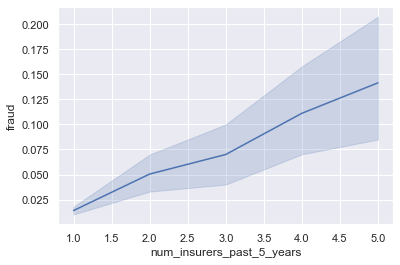

In [31]:
combined = claims.join(customer)
sns.lineplot(x="num_insurers_past_5_years", y="fraud", data=combined);

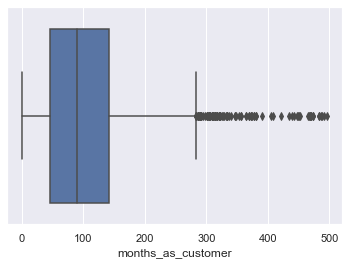

In [32]:
sns.boxplot(x=customer["months_as_customer"]);

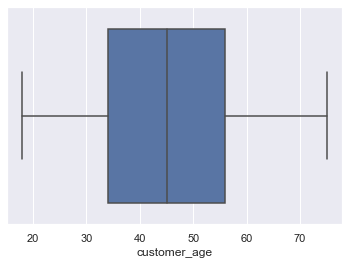

In [33]:
sns.boxplot(x=customer.customer_age);

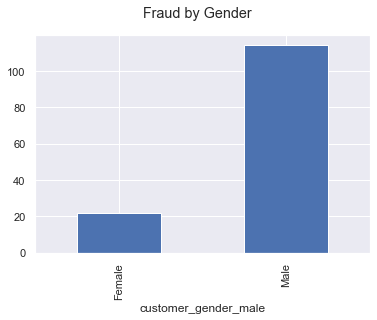

In [37]:
combined.groupby(customer.customer_gender_male).sum().fraud.plot.bar()
plt.xticks([0,1],['Female','Male'])
plt.suptitle("Fraud by Gender")
plt.show()

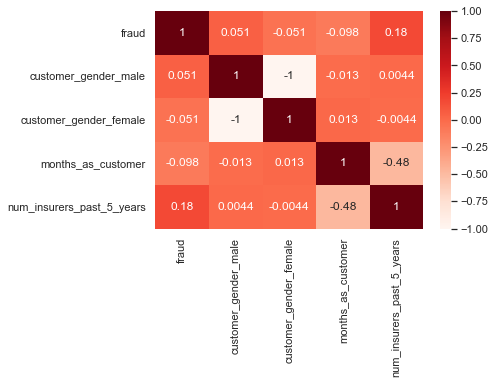

In [38]:
# Creating a correlation matrix of fraud, gender, months as customer, and number of different insurers
cols = [
    "fraud",
    "customer_gender_male",
    "customer_gender_female",
    "months_as_customer",
    "num_insurers_past_5_years",
]
corr = combined[cols].corr()

# plot the correlation matrix
sns.heatmap(corr, annot=True, cmap="Reds");

In [39]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   incident_severity                5000 non-null   float64
 1   num_vehicles_involved            5000 non-null   int64  
 2   num_injuries                     5000 non-null   int64  
 3   num_witnesses                    5000 non-null   int64  
 4   police_report_available          5000 non-null   float64
 5   injury_claim                     5000 non-null   int64  
 6   vehicle_claim                    5000 non-null   int64  
 7   total_claim_amount               5000 non-null   int64  
 8   incident_month                   5000 non-null   int64  
 9   incident_day                     5000 non-null   int64  
 10  incident_dow                     5000 non-null   int64  
 11  incident_hour                    5000 non-null   int64  
 12  fraud               

In [40]:
df = pd.read_csv('data/claims_customer.csv')

In [41]:
df.head()

,Unnamed: 0,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
0,0,1675,0,0,750,0,0,2,0,1,...,0,20,12000.0,0,0,3000,1,0,0,0
1,1,9,0,0,750,0,0,9,0,1,...,0,15,18500.0,0,1,3000,0,0,0,0
2,2,1687,0,1,750,0,0,7,1,1,...,0,16,17500.0,0,1,3000,0,0,0,0
3,3,1687,0,1,750,0,0,7,0,1,...,0,16,17500.0,0,1,3000,0,0,0,0
4,4,1692,0,0,750,2,0,6,1,1,...,0,8,21500.0,0,1,2800,1,0,0,1


In [45]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,policy_id,incident_type_theft,policy_state_ca,policy_deductable,num_witnesses,policy_state_or,incident_month,customer_gender_female,num_insurers_past_5_years,customer_gender_male,...,policy_state_id,incident_hour,vehicle_claim,fraud,incident_type_collision,policy_annual_premium,policy_state_az,policy_state_wa,collision_type_rear,collision_type_front
0,1675,0,0,750,0,0,2,0,1,0,...,0,20,12000.0,0,0,3000,1,0,0,0
1,9,0,0,750,0,0,9,0,1,1,...,0,15,18500.0,0,1,3000,0,0,0,0
2,1687,0,1,750,0,0,7,1,1,0,...,0,16,17500.0,0,1,3000,0,0,0,0
3,1687,0,1,750,0,0,7,0,1,1,...,0,16,17500.0,0,1,3000,0,0,0,0
4,1692,0,0,750,2,0,6,1,1,0,...,0,8,21500.0,0,1,2800,1,0,0,1


In [52]:
df['policy_deductable'].value_counts()
#value_counts shows the most frequently occured values at the first index 

750     19788
800       106
850        46
900        24
950        20
1100        8
1050        6
1000        2
Name: policy_deductable, dtype: int64

In [48]:
#show combine stats: unique, missing, or large percentage category in the combined dataset.
combine_stats = []
for c in df.columns:
    combine_stats.append(
        (
        c,
        df[c].nunique(),
        df[c].isnull().sum()*100 / df.shape[0],
        df[c].value_counts(normalize = True, dropna= False).values[0]*100,
        df[c].dtype
        )
    )
print(combine_stats)

[('policy_id', 5000, 0.0, 0.02, dtype('int64')), ('incident_type_theft', 2, 0.0, 95.17999999999999, dtype('int64')), ('policy_state_ca', 2, 0.0, 62.03999999999999, dtype('int64')), ('policy_deductable', 8, 0.0, 98.94, dtype('int64')), ('num_witnesses', 6, 0.0, 51.580000000000005, dtype('int64')), ('policy_state_or', 2, 0.0, 93.0, dtype('int64')), ('incident_month', 12, 0.0, 10.67, dtype('int64')), ('customer_gender_female', 2, 0.0, 62.760000000000005, dtype('int64')), ('num_insurers_past_5_years', 5, 0.0, 77.68, dtype('int64')), ('customer_gender_male', 2, 0.0, 57.65, dtype('int64')), ('total_claim_amount', 4978, 0.0, 1.29, dtype('float64')), ('authorities_contacted_police', 2, 0.0, 70.50999999999999, dtype('int64')), ('incident_day', 31, 0.0, 3.7900000000000005, dtype('int64')), ('collision_type_side', 2, 0.0, 78.91, dtype('int64')), ('customer_age', 58, 0.0, 3.09, dtype('int64')), ('customer_education', 5, 0.0, 44.29, dtype('int64')), ('driver_relationship_child', 2, 0.0, 95.49, dtyp

In [49]:
#put combined stats in a dataframe
stats = pd.DataFrame(combine_stats, columns=['features','unique_values','missing_values_perct','most_frequent_value_perct','datatype'])
stats.head()

,features,unique_values,missing_values_perct,most_frequent_value_perct,datatype
0,policy_id,5000,0.0,0.02,int64
1,incident_type_theft,2,0.0,95.18,int64
2,policy_state_ca,2,0.0,62.04,int64
3,policy_deductable,8,0.0,98.94,int64
4,num_witnesses,6,0.0,51.58,int64


In [53]:
stats.sort_values('most_frequent_value_perct', ascending=False)

,features,unique_values,missing_values_perct,most_frequent_value_perct,datatype
3,policy_deductable,8,0.0,98.94,int64
28,authorities_contacted_ambulance,2,0.0,97.45,int64
37,policy_state_id,2,0.0,97.27,int64
35,authorities_contacted_fire,2,0.0,97.20,int64
40,fraud,2,0.0,97.00,int64
36,driver_relationship_other,2,0.0,96.06,int64
16,driver_relationship_child,2,0.0,95.49,int64
27,policy_state_nv,2,0.0,95.23,int64
1,incident_type_theft,2,0.0,95.18,int64
23,num_claims_past_year,8,0.0,93.28,int64


In [54]:
sns.set_style("white")

corr_list = [
    "customer_age",
    "months_as_customer",
    "total_claim_amount",
    "injury_claim",
    "vehicle_claim",
    "incident_severity",
    "fraud",
]

corr_df = df[corr_list]
corr = round(corr_df.corr(), 2)
print(corr)

                    customer_age  months_as_customer  total_claim_amount  \
customer_age                1.00                0.55               -0.00   
months_as_customer          0.55                1.00               -0.01   
total_claim_amount         -0.00               -0.01                1.00   
injury_claim               -0.00               -0.01                0.93   
vehicle_claim              -0.00               -0.01                0.45   
incident_severity           0.00               -0.00                0.38   
fraud                      -0.02               -0.03               -0.03   

                    injury_claim  vehicle_claim  incident_severity  fraud  
customer_age               -0.00          -0.00               0.00  -0.02  
months_as_customer         -0.01          -0.01              -0.00  -0.03  
total_claim_amount          0.93           0.45               0.38  -0.03  
injury_claim                1.00           0.10               0.11  -0.01  
vehicle_cla

### Use seaborn to plot a correlation matrix heatmap

C:\Users\cinna\AppData\Local\Temp\ipykernel_31044\556657717.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


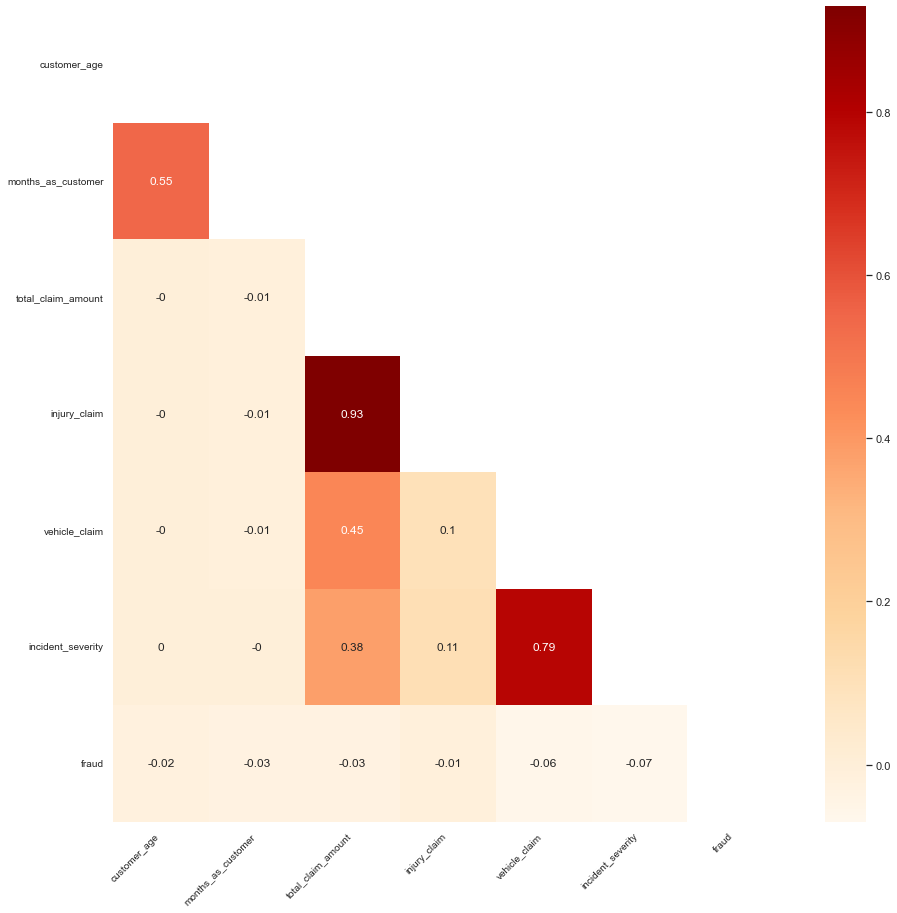

In [55]:
fix, ax = plt.subplots(figsize=(15, 15))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap="OrRd")

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha="right", rotation=45)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()